#Getting started: Setup phase
To get started with this exercises notebook, first make the necessary imports.

In [6]:
!pip install -q langchain langchain-classic langchain-community langchain-core langchain-openai wikipedia

from google.colab import userdata
from transformers import pipeline
from langchain_community.utilities import GoogleSerperAPIWrapper
from langchain_community.document_loaders import CSVLoader
from langchain_core.prompts import PromptTemplate
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI
from langchain_community.document_loaders import WikipediaLoader
from IPython.display import Markdown
import ast
import os
import pprint
import getpass

  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 17.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 51.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 489.1/489.1 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.0/51.0 kB 3.3 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests==2.32.4, but you have requests 2.32.5 which is incompatible.


Then, assign the API keys to be able to use Google Serper and OpenAI.

When working with sensitive information like API keys or passwords in Google Colab, it's crucial to handle data securely. As you learnt in the tutorial session, two common approaches for this are using **Colab's Secrets Manager**, which stores and retrieves secrets without exposing them in the notebook, and `getpass`, a Python function that securely prompts users to input secrets during runtime without showing them. Both methods help ensure your sensitive data remains protected.

In [7]:
#When using Colab Secret Manager
os.environ["SERPER_API_KEY"] = userdata.get('SERPER_API_KEY')
#When using getpass
#os.environ['SERPER_API_KEY'] = getpass.getpass()

#When using Colab Secret Manager
os.environ["OPENAI_API_KEY"] = userdata.get('OPENAI_API_KEY')
#When using getpass
#os.environ['OPENAI_API_KEY'] = getpass.getpass()

Lastly, define the search model and the llm to use throughout.

In [8]:
search = GoogleSerperAPIWrapper()

llm = ChatOpenAI(model="gpt-5-mini")

You now have everything set up to carry out the exercises in this notbook.

#Exercise 1: Load and summarize a Wikipedia article

This exercise introduces a **simple multi-step pipeline** built with LangChain.

You will:
1. Load an article from Wikipedia using a LangChain loader
2. Convert the content into structured documents
3. Use a prompt template and an LLM to extract representative keywords from the article

This exercise demonstrates how multiple components—data loading, prompt templates, and model calls—can be composed into a reusable workflow.
A visualization of the solution is depicted below.


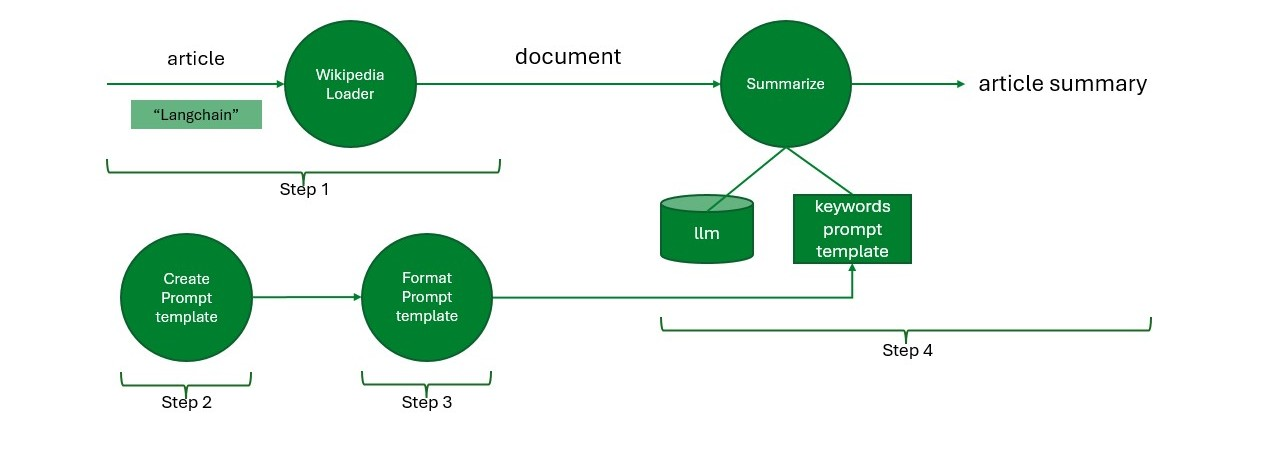

### Part 1. Load the Wikipedia article

Use the Langchain Wikipedia loader that you have seen in the tutorial to load an article about Langchain.

In [9]:
# Load the article
## YOUR CODE (START)

# Load content from Wikipedia using WikipediaLoader
loader = WikipediaLoader("langchain")
document = loader.load()
display(Markdown(document[0].page_content))

wikipediaPage = document[0].page_content
## YOUR CODE (END)

LangChain is a software framework that helps facilitate the integration of large language models (LLMs) into applications. As a language model integration framework, LangChain's use-cases largely overlap with those of language models in general, including document analysis and summarization, chatbots, and code analysis.


== History ==
LangChain was launched in October 2022 as an open source project by Harrison Chase, while working at machine learning startup Robust Intelligence. In April 2023, LangChain had incorporated and the new startup raised over $20 million in funding at a valuation of at least $200 million from venture firm Sequoia Capital, a week after announcing a $10 million seed investment from Benchmark.
In the third quarter of 2023, the LangChain Expression Language (LCEL) was introduced, which provides a declarative way to define chains of actions.
In October 2023 LangChain introduced LangServe, a deployment tool to host LCEL code as a production-ready API.
In February 2024 LangChain released LangSmith, a closed-source observability and evaluation platform for LLM applications, and announced a US $25 million Series A led by Sequoia Capital. On 14 May 2025 the company launched LangGraph Platform into general availability, providing managed infrastructure for deploying long-running, stateful AI agents.


== Capabilities ==
LangChain's developers highlight the framework's applicability to use-cases including chatbots, retrieval-augmented generation,  document summarization, and synthetic data generation.
As of March 2023, LangChain included integrations with systems including Amazon, Google, and Microsoft Azure cloud storage; API wrappers for news, movie information, and weather; Bash for summarization, syntax and semantics checking, and execution of shell scripts; multiple web scraping subsystems and templates; few-shot learning prompt generation support; finding and summarizing "todo" tasks in code; Google Drive documents, spreadsheets, and presentations summarization, extraction, and creation; Google Search and Microsoft Bing web search; OpenAI, Anthropic, and Hugging Face language models; iFixit repair guides and wikis search and summarization; MapReduce for question answering, combining documents, and question generation; N-gram overlap scoring; PyPDF, pdfminer, fitz, and pymupdf for PDF file text extraction and manipulation; Python and JavaScript code generation, analysis, and debugging; Milvus vector database to store and retrieve vector embeddings; Weaviate vector database to cache embedding and data objects; Redis cache database storage; Python RequestsWrapper and other methods for API requests; SQL and NoSQL databases including JSON support; Streamlit, including for logging; text mapping for k-nearest neighbors search; time zone conversion and calendar operations; tracing and recording stack symbols in threaded and asynchronous subprocess runs; and the Wolfram Alpha website and SDK. As of April 2023, it can read from more than 50 document types and data sources.


== LangChain tools ==


== References ==


== External links ==

Official website
Langchain-ai on GitHub

### Part 2. Create a prompt template

Create a prompt template called `keywords_prompt_template` that asks to extract 5 representative keywords from the contents of a Wikipedia article represented by the variable `article`.

In [10]:
# Create the prompt template
## YOUR CODE (START)

keywords_prompt_template = PromptTemplate.from_template(
    "Extract 5 keywords from this article: {article}"
)

## YOUR CODE (END)

### Part 3. Format the prompt template

Format the prompt template by assigning to the variable `article` the content of the Wikipedia page you loaded in the first step.

In [11]:
# Format the template
## YOUR CODE (START)
keywords_prompt = keywords_prompt_template.format(article=wikipediaPage)
## YOUR CODE (END)

### Part 4. Generate the keywords and display the result

Invoke the `llm` with the formatted prompt to obtain the keywords. Then, display the result using Markdown.

In [12]:
#Invoke the llm with the formatted template and display the result
## YOUR CODE (START)
response = llm.invoke(keywords_prompt)
display(Markdown(response.content))
## YOUR CODE (END)

- LangChain
- Large language models (LLMs)
- LangChain Expression Language (LCEL)
- LangServe
- LangSmith

# Exercise 2: Trading insights from a fixed list of companies
In this exercise, you will get actionable insights for investment based on recent trading results of the companies you are investing in.

(1) You will first retrieve a list of ticker symbols for companies, then

(2) retrieve the trading results for these companies from Google, then

(3) define a function using the OpenAI API to generate a report of the results, and

(4) define a function to generate actionable insights based on the report, and finally

(5) combine the two functions into a sequential chain.

To accomplish this, you can expand the code provided in the following.

A visualization of the solution to this exercise is depicted below.

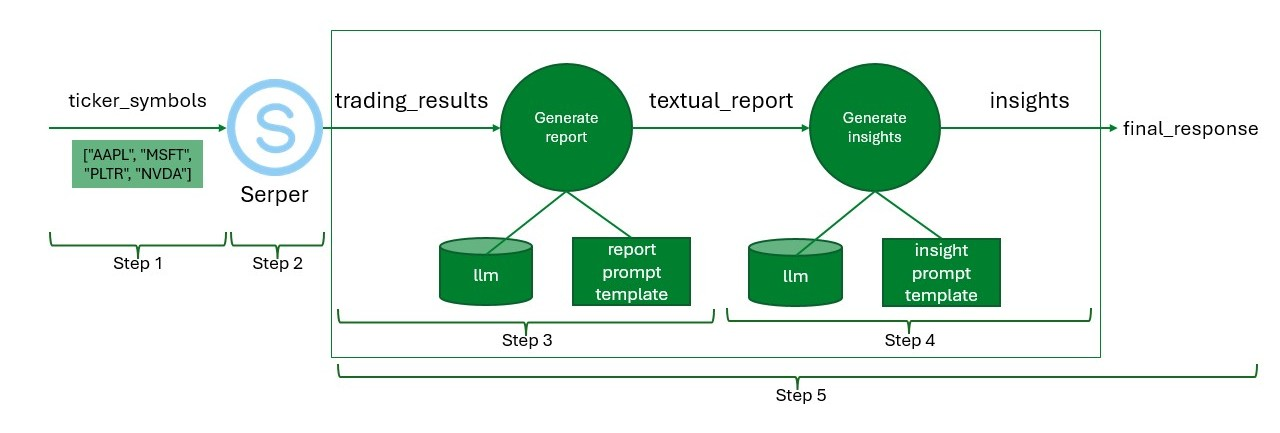

### Part 1. Load the ticker symbols of the companies you invest in
In the first part, you load a list of ticker symbols of companies in the stock market.

Here, we assume that the list is predefined with the symbols of Apple, Microsoft, Palantir, and NVIDIA.

In [13]:
ticker_symbols = ["AAPL", "MSFT", "PLTR", "NVDA"]

### Part 2. Retrieve recent trading results for the ticker symbols

Use the `GoogleSerperAPIWrapper` (which you assigned to `search` in the Setup phase) to run a query for each ticker symbol in `ticker_symbols`.

**Hint:** To do so, iterate over the individual ticker symbols in the list using the "`for ... in ...:`" structure. In each iteration, it is sufficient to just call the method `run` of the GoogleSerperAPIWrapper (identified by `search`) passing the ticker symbol as parameter: the query will return the recent trading results for the respective company. For example, if you search `AAPL`, the result will look like `233.28 -1.12 (0.48%)`.

The result of running the queries (one per ticker symbol) should be a concatenation of the individual results in a single string `trading_results`. The structure of this string should be as follows: a ticker symbol, followed by the respective trading result, and then a semicolon (";"), followed by the same structure for the remaining symbols. An example for the result is as follows:

`AAPL 233.28 -1.12 (0.48%);MSFT 415.67 -1.52 (0.36%);PLTR 217.76 -0.70 (0.32%);NVDA 131.76 -1.47 (1.10%);`

In [14]:
# Initialize an empty string where to append the results
trading_results = ""

# Iterate over the ticker symbols to run the query and append the results as specified
## YOUR CODE (START)
for ticker in ticker_symbols:
  result = search.run(ticker)
  trading_results += ticker + " " + result + ";"
  print (result)
## YOUR CODE (END)

256.79 -3.56 (1.37%)
477.87 -5.77 (1.19%)
178.61 -3.07 (1.69%)
185.42 -3.76 (1.98%)


In [15]:
# Display the trading results in Markdown
display(Markdown(trading_results))

AAPL 256.79 -3.56 (1.37%);MSFT 477.87 -5.77 (1.19%);PLTR 178.61 -3.07 (1.69%);NVDA 185.42 -3.76 (1.98%);

### Part 3. Create a prompt template to get a report in natural language for the trading results

Use `PromptTemplate` to define a prompt template called `report_prompt_template`.

The prompt template should take as input variable the string `trading_results` that was generated in the previous step.

The template should ask the llm to provide a report for the trading results that are in the input variable.

The template should specify that the report must only talk about variations in percent, not in dollars.

The template should also specify that the report must have a maximum length of 200 words.

In [16]:
# Define the prompt template
## YOUR CODE (START)
report_prompt_template = PromptTemplate(
    input_variables=["trading_results"],
    template=(
        "Based on the list with tickter symbols {trading_results}, create a report with max lenght of 200 words. The report must talk only about variations #in percent, not in dollars")
    )
## YOUR CODE (END)

### Part 4. Create a prompt template to generate actionable insights for investors based on a report

Use PromptTemplate to define a prompt template `insight_prompt_template`.

The prompt template should take as input variable `textual_report` (which is going to be the output of the previous prompt template).

The template should ask the llm to provide actionable insights for investors based on the report in the input variable.

The template should also specify that the insights for each company mentioned in the report must have a maximum length, e.g., 50 words.

In [17]:
# Define the prompt template
## YOUR CODE (START)
insight_prompt_template = PromptTemplate(
    input_variables =["textual_report"],
    template=(
        "Based on the following trading report about selected companies, for"
        "each mention company extract 50-words actionable insights for investors: {textual_report}"
    )
)
## YOUR CODE (END)

### Part 5. Create a sequential chain where the trading results from Part 2 are used as input and the daily report and actionable insights are printed

Use `RunnablePassthrough` combined with the `assign()` method to create a structured, multi-stage chain called `complete_chain`, with:

* `textual_report` as the output variable for the first prompt processing,
* `insights` as the output of the second prompt processing
* `llm` (which was defined in the Setup phase) as the model processing the prompts.

In [18]:
# Combine the chains
## YOUR CODE (START)
complete_chain = (
    RunnablePassthrough()
    .assign(textual_report=report_prompt_template | llm | StrOutputParser())
    .assign(insights_report=insight_prompt_template | llm | StrOutputParser())
)
## YOUR CODE (END)

Invoke the `complete_chain`, passing `trading_results` from Step 2 as the input variable for `trading_results`.

The result of the complete chain invocation should be assigned to a variable called `final_response`.

In [19]:
# Run the complete chain
## YOUR CODE (START)
final_response = complete_chain.invoke({"trading_results": trading_results})
## YOUR CODE (END)

Lastly, display the results of the chain invocation to read the report and insights:

In [21]:
# Display the result of the chain
display(Markdown(final_response["textual_report"]))
display(Markdown(final_response["insights_report"]))

All four names moved lower on the session, measured by percent change. NVDA led the pullback, down 1.98%, followed by PLTR, down 1.69%. AAPL declined 1.37%, while MSFT showed the smallest drop at 1.19%. The mean decline across the group was roughly 1.56%, indicating a modest, broad-based pullback rather than an outsized move in any single name. Relative strength remains similar across the quartet, with no single ticker showing an extreme percent divergence versus the others.

NVDA — NVIDIA’s 1.98% pullback could offer a tactical entry for long-term AI-focused investors, but valuations remain rich. Consider scaling in on confirmed technical support, monitor earnings, supply and demand for GPUs, and use defined-risk option strategies or trailing stops to manage position-size and protect capital on continued volatility and market breadth.

PLTR — Palantir’s 1.69% drop emphasizes continued volatility; investors should prioritize fundamentals and contract cadence. Monitor new government and commercial deal announcements, revenue visibility, and free cash flow trends. Consider conservative position sizing, defined stop-loss levels, or short-duration options strategies. Avoid averaging down without improved earnings or contract clarity and risk limits.

AAPL — AAPL’s 1.37% decline is modest; investors should assess upcoming product cycle, services growth, and supply-chain updates as catalysts. Consider accumulating on confirmed support for long-term exposure to cash flow and buybacks, or use covered calls to generate income. Rebalance if tech weightings drift and set prudent stop-losses and monitor sentiment.

MSFT — Microsoft’s modest 1.19% pullback underscores relative strength; consider maintaining core exposure to cloud and enterprise software secular trends. Monitor guidance for Azure and enterprise spending, and evaluate buying on confirmed dips. Use covered calls to enhance yield or defined-risk options for leverage; trim positions if valuation or margin trends deteriorate.

# Exercise 3: Testing with different lists of companies

In exercise 2, you used a list of given ticker symbols, set in Part 1 with `ticker_symbols = ["AAPL", "MSFT", "PLTR", "NVDA"]`.

Test the code with different ticker symbols. For this, modify the list `ticker_symbols` by replacing `["AAPL", "MSFT", "PLTR", "NVDA"]` with other ticker symbols.

Re-execute Part 2 and Part 5 from exercise 2, this time using a new list of four ticker symbols of your choice. There is no need to re-execute Part 3 and Part 4 as the prompt templates and chains can be reused.

**Hint:** You can refer to https://stockanalysis.com/stocks/ to get inspiration and find new symbols. You can modify the list at the beginning of the exercise, without having to write new code here.

A visualization of the solution to this exercise is depicted below.

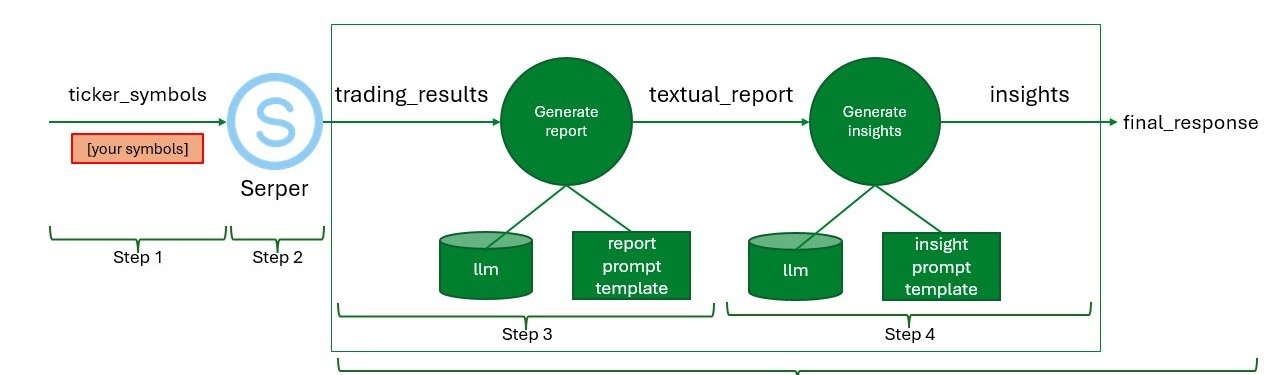

# Exercise 4: Testing with different models and prompts

In the beginning, you defined the LLM in the Setup phase with `llm = ChatOpenAI(model="gpt-5-mini")`, and used this LLM throughout all subsequent steps. Moreover, in exercise 2 you defined the prompts to get the trading results and the insights.

In this exercise, you will iterate defining and executing the chain with different models and prompts. For this, you can just replace `gpt-5-mini` with another OpenAI model of your choice, such as `gpt-5.1-mini`, `gpt-5.1-nano`, `gpt-5.1`. You should also revise the prompts based on the results you obtained in the previous executions, for example to obtain a more focused report and more detailed insights.

Then re-execute Parts 3--5 of your solution to exercise 2, evaluate the results, and try again using a different model and prompts.

**Hint:** You can refer to https://platform.openai.com/docs/models for a list of available models. You can modify the code cells in exercise 2, without having to write new code here.

A visualization of the solution to this exercise is depicted below.

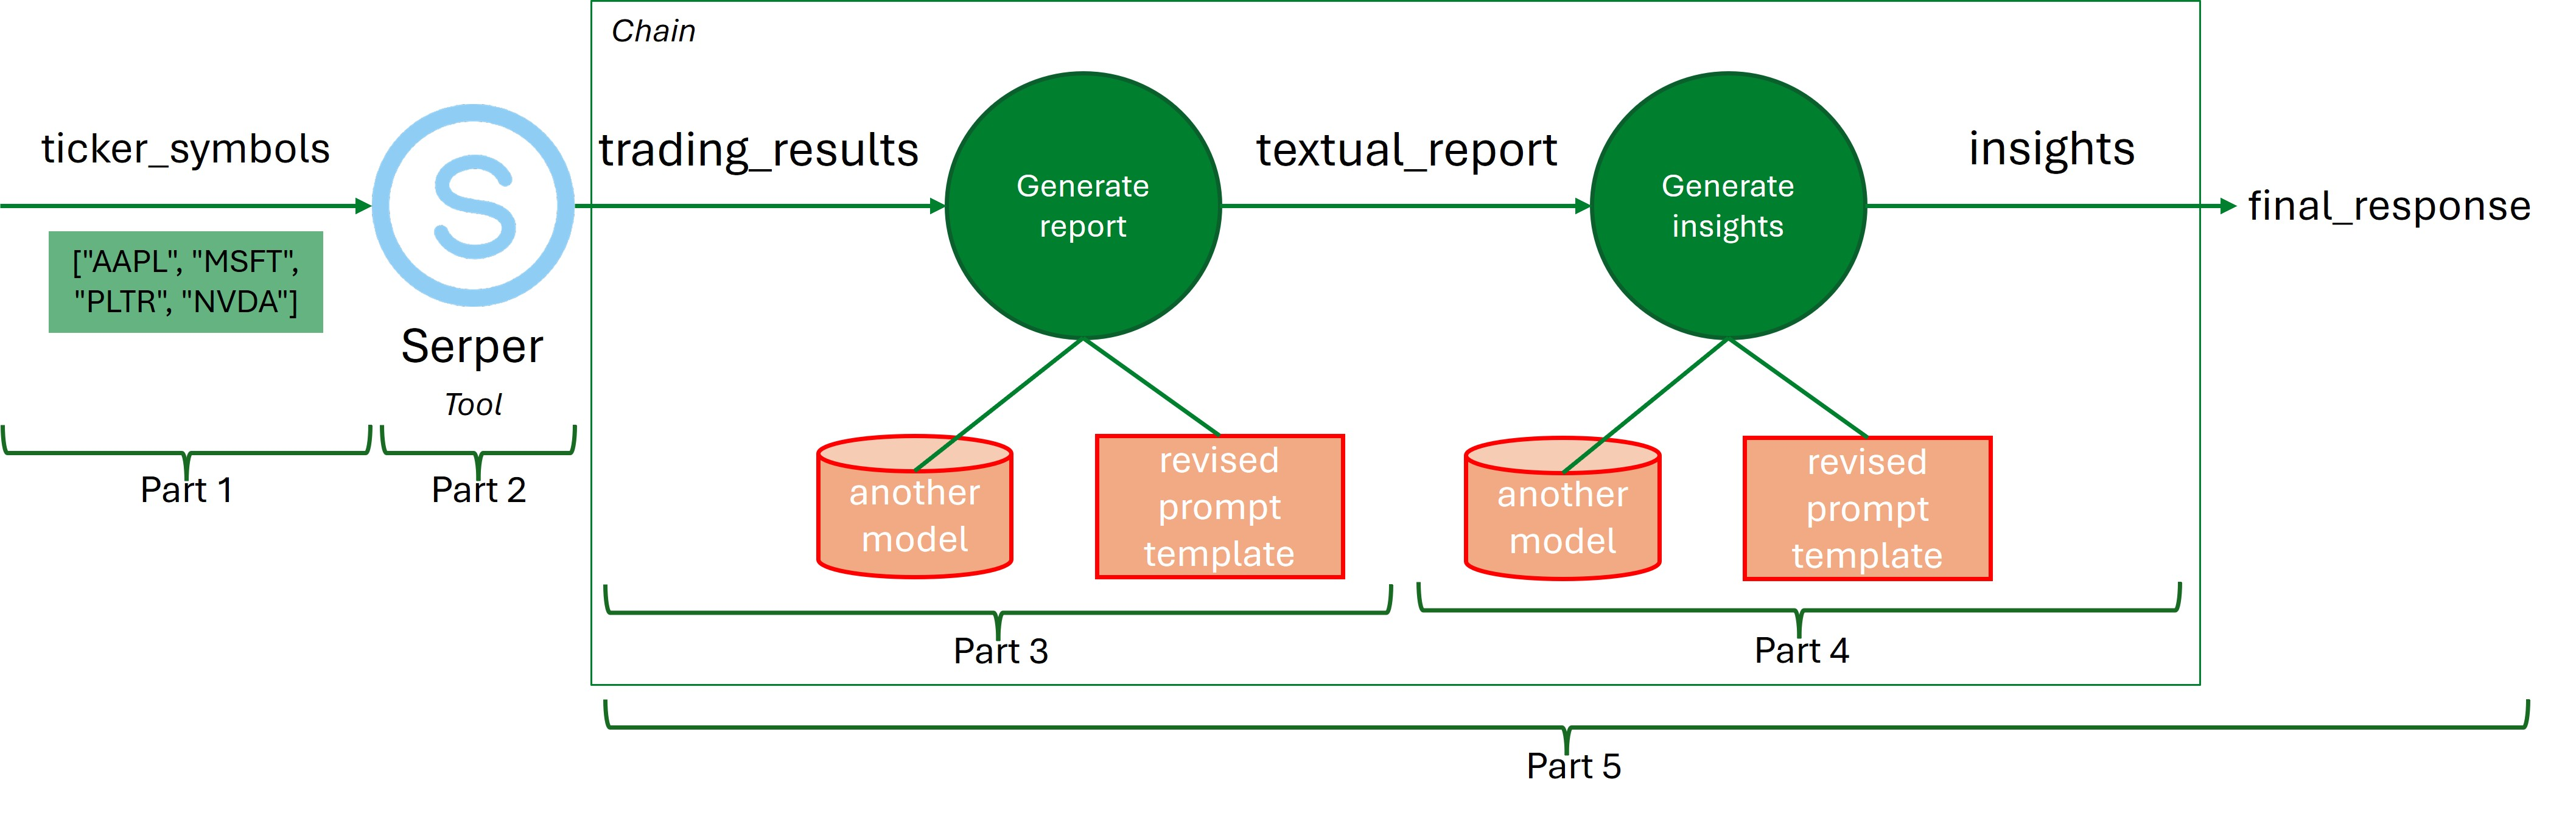

In [23]:
llm2 = ChatOpenAI(model="gpt-5-mini")

In [24]:
complete_chain_different_model = (
    RunnablePassthrough()
    .assign(textual_report=report_prompt_template | llm2 | StrOutputParser())
    .assign(insights=insight_prompt_template | llm2 | StrOutputParser())
)

In [25]:
final_response_different_model = complete_chain_different_model.invoke({"trading_results": trading_results})

# Exercise 5: Trading insights from a CSV file with companies

In the previous exercises, you used a fixed lists of ticker symbols, which is not flexible.

In this exercise, you will extend the solution of exercise 2, so that the list of ticker symbols is loaded from a CSV file `ticker_symbols.csv`.

To accomplish this, you can first expand the code provided below. More specifically, expand the code in Part 1; for Parts 2--5, you can then re-execute the code cells defined above (exercise 2), since the prompt templates and the sequential chain are reusable.

A visualization of the solution to this exercise is depicted below.

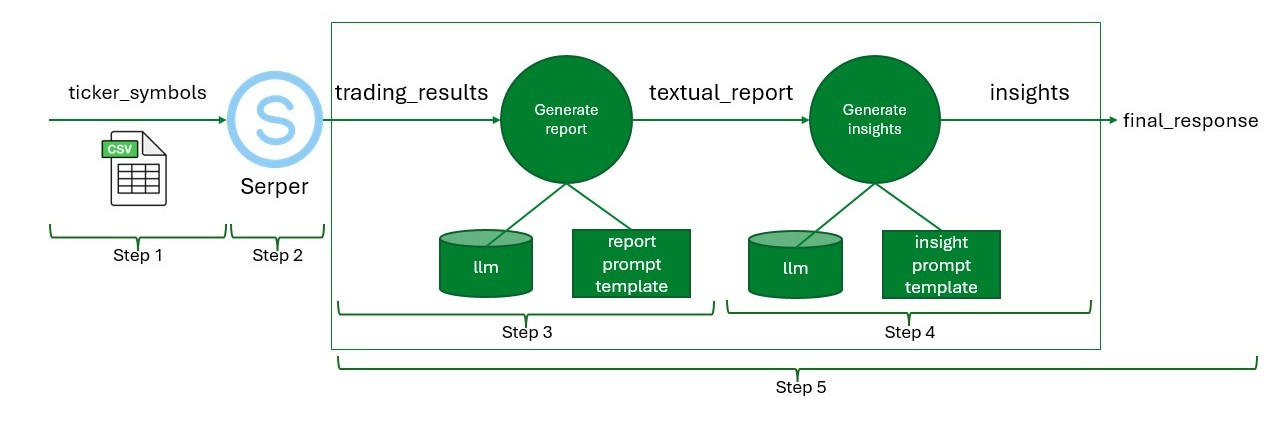

### Part 1: Load from a CSV file the ticker symbols of the companies you invest in

In the first step, you load a list of ticker symbols of companies in the stock market. The list is provided in a CSV file `ticker_symbols.csv`. You can find the CSV File in Canvas. Store the file locally on your computer and upload it using the upload option at the top of the file-explorer pane to upload any file(s) from your local file system to Colab in the present working directory.

Use `CSVLoader` to load the CSV file into a variable called `ticker_document`.

In [27]:
# Load and split the CSV content
## YOUR CODE (START)
loader = CSVLoader(file_path="/content/sample_data/ticker_symbols.csv")
ticker_document = loader.load()
## YOUR CODE (END)

Now that the CSV file is loaded into `ticker_document`, you can ask an LLM to read `ticker_document` and return a list of the ticker symbols in it.

To do so, use `PrompTemplate` to define a prompt template called `ticker_prompt_template`.

The prompt template should take an input variable `document`.

The template should ask to provide a list with the ticker symbols extracted from the document in input.

In [28]:
# Define the prompt template
## YOUR CODE (START)

ticker_prompt_template = PromptTemplate(
    input_variables =["document"],
    template=(
        "Give me a list with the tickter symbols etracated from the attached document"
        "{document}. The response should just bea list of strings in double quotes"
    )
)

## YOUR CODE (END)

Next, define a `ticker_prompt` by using `format` to format the prompt template so that the input variable `document` is bound to `ticker_document`.

In [29]:
# Format the ticker prompt template
## YOUR CODE (START)

ticker_prompt = ticker_prompt_template.format(document=ticker_document)

## YOUR CODE (END)

Now invoke the model (`llm`) passing the `ticker_prompt` as parameter; the output of the invocation should be assigned to variable `ticker_symbols_from_llm`. Note that this output is an object of type string representing a list.

In [30]:
#Run the chain
## YOUR CODE (START)

ticker_symbols_from_llm = llm.invoke(ticker_prompt)
print(ticker_symbols_from_llm.content)
print(type(ticker_symbols_from_llm.content))
## YOUR CODE (END)

["AAPL", "AMZN", "MSFT", "NVDA"]
<class 'str'>


Lastly, convert the string `ticker_symbols_from_llm` into a list called `ticker_symbols`.

To do so, you can use function `ast.literal_eval`, passing `ticket_symbols_from_llm.content` as parameter.

Assign the result of the invocation to variable `ticker_symbols`, and print it.

In [31]:
#Run the chain
## YOUR CODE (START)
ticker_symbols = ast.literal_eval(ticker_symbols_from_llm.content)
print(ticker_symbols)
## YOUR CODE (END)

['AAPL', 'AMZN', 'MSFT', 'NVDA']


def trading_Now you have a list `ticker_symbols` that originates from a CSV file and that you can use to get trading results and actionable insights, like in exercise 2.

The continuation now is the same as in exercise 2: once you execute the code in the above cells of Exercise 5, you can continue by re-executing the code in the cells of Parts 2--5 above.

In [32]:
def trading_result_fn(ticker_symbols):

    trading_results = ""

    for ticker_symbol in ticker_symbols:
      result = search.run(ticker_symbol)
      trading_results = trading_results + ticker_symbol + " " + result + ";"

    return trading_results

trading_results = trading_result_fn(ticker_symbols)
final_response = complete_chain.invoke({"trading_results": trading_results})

display(Markdown(final_response["textual_report"]))
display(Markdown(final_response["insights_report"]))


Market summary: Three of the four names fell while one gained. Apple dropped 1.47%, Microsoft declined 1.14%, and Nvidia slid 1.96%, the largest move among the group. Amazon was the lone gainer, up 1.31%. The range of moves was from +1.31% to -1.96%, with an average change of about -0.82%. Overall, the set shows modest net weakness driven by Nvidia and Apple, while Amazon provided a positive offset.

Apple: Apple’s 1.47% drop suggests short-term profit-taking. Investors should evaluate fundamentals, upcoming product announcements, and services revenue trend. Consider adding on weakness if conviction high, use limit orders near technical support, set stop-loss to protect capital, and monitor supply-chain signals and margin guidance before increasing exposure over the next two quarters.

Microsoft: Microsoft’s 1.14% decline appears modest; investors should assess Azure growth, enterprise subscription resilience, and margin trends. Consider buying incremental shares on confirmed support breaks or using covered calls to generate income. Watch guidance, enterprise IT spend indicators, and competitor cloud pricing. Position size should reflect macro sensitivity and cloud drivers.

Nvidia: Nvidia’s 1.96% slide highlights short-term volatility despite strong AI secular tailwinds. Investors should verify data-center demand, analyst revisions, and inventory metrics before adding. Consider scaling in gradually, using protective puts if concerned about near-term pullbacks, and set target prices based on AI exposure, fabs’ capacity, and relative valuation versus peers.

Amazon: Amazon’s 1.31% gain signals resilience; investors should track e-commerce trends, Prime engagement, and AWS profitability. Consider adding shares on breakout confirmation or holding for secular cloud and advertising growth. Monitor margin recovery, fulfillment costs, and pricing power. Use trailing stops or options collars if concerned about macro-driven consumer weakness near-term.